### Objective

**Defining clusters for the 6_all_data.csv based on their audio features.**

*clustered_df.to_csv('./cache/6_clustered_df.csv', index=False)  
audio_df.to_csv('./cache/6_all_data.csv', index=False)

  and: pickles cluster_model and scaler *

### Objective

Using spotipy API to retrieve songs from various playlists.  
**Fourth step is retrieving the songs audio features.**

In order to not send too many API request of same nature, I am saving the intermediate result. 

*Output: 5_Song_Audio_Features.csv*, columns 'category_id', 'category_name', 'playlist_id', 'playlist_name', 'song_id', 'song_artist', song_title

In [1]:
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from spotipy_util import retrieve_sp

pd.set_option('display.max_columns', None)

In [2]:
audio_df = pd.read_csv('./cache/5_Song_Audio_Features.csv')
audio_df

,category_id,category_name,playlist_id,playlist_name,song_id,song_artist,song_title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0JQ5DAqbMKFQ00XGBls6ym,Hip-Hop,37i9dQZF1DX36edUJpD76c,Modus Mio,6df3If2RzcZ0CP79sVEuSe,"Olexesh, Bonez MC",Cabrio,0.801,0.470,11.0,-9.603,0.0,0.3440,0.3610,0.000248,0.1040,0.483,103.028,audio_features,6df3If2RzcZ0CP79sVEuSe,spotify:track:6df3If2RzcZ0CP79sVEuSe,https://api.spotify.com/v1/tracks/6df3If2RzcZ0...,https://api.spotify.com/v1/audio-analysis/6df3...,121548.0,4.0
1,0JQ5DAqbMKFQ00XGBls6ym,Hip-Hop,37i9dQZF1DX36edUJpD76c,Modus Mio,3pPMgoouYtezLiBTEeL9be,"FOURTY, Bausa",VEMPA,0.919,0.609,6.0,-4.492,1.0,0.0633,0.1290,0.000457,0.0627,0.866,133.981,audio_features,3pPMgoouYtezLiBTEeL9be,spotify:track:3pPMgoouYtezLiBTEeL9be,https://api.spotify.com/v1/tracks/3pPMgoouYtez...,https://api.spotify.com/v1/audio-analysis/3pPM...,134528.0,4.0
2,0JQ5DAqbMKFQ00XGBls6ym,Hip-Hop,37i9dQZF1DX36edUJpD76c,Modus Mio,6aCAQmJMBHve3Tfelte1HR,"Dardan, Azet",Pa Mu,0.806,0.778,7.0,-7.360,0.0,0.0547,0.2810,0.000008,0.1560,0.359,104.014,audio_features,6aCAQmJMBHve3Tfelte1HR,spotify:track:6aCAQmJMBHve3Tfelte1HR,https://api.spotify.com/v1/tracks/6aCAQmJMBHve...,https://api.spotify.com/v1/audio-analysis/6aCA...,170500.0,4.0
3,0JQ5DAqbMKFQ00XGBls6ym,Hip-Hop,37i9dQZF1DX36edUJpD76c,Modus Mio,16f4ZN6XOfrIO8fJkm28HM,"AYLIVA, Apache 207",Wunder,0.857,0.687,10.0,-5.777,0.0,0.0785,0.1090,0.000577,0.0971,0.531,99.969,audio_features,16f4ZN6XOfrIO8fJkm28HM,spotify:track:16f4ZN6XOfrIO8fJkm28HM,https://api.spotify.com/v1/tracks/16f4ZN6XOfrI...,https://api.spotify.com/v1/audio-analysis/16f4...,176492.0,4.0
4,0JQ5DAqbMKFQ00XGBls6ym,Hip-Hop,37i9dQZF1DX36edUJpD76c,Modus Mio,5g6kQitL4OSo9tWkWDGkNT,"Celo & Abdi, Summer Cem, Nimo",So So Def (feat. Summer Cem & Nimo),0.679,0.713,1.0,-8.094,1.0,0.3530,0.0295,0.000000,0.1330,0.660,99.899,audio_features,5g6kQitL4OSo9tWkWDGkNT,spotify:track:5g6kQitL4OSo9tWkWDGkNT,https://api.spotify.com/v1/tracks/5g6kQitL4OSo...,https://api.spotify.com/v1/audio-analysis/5g6k...,169411.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12037,0JQ5DAqbMKFRY5ok2pxXJ0,Cooking & Dining,37i9dQZF1DX5Vpt0fhumU1,Spanish Tapas Bar,2SbLBxUtlSzz8nIYFQstwq,Govi,Samba Delight,0.695,0.482,11.0,-13.238,0.0,0.0390,0.8610,0.896000,0.1030,0.670,92.980,audio_features,2SbLBxUtlSzz8nIYFQstwq,spotify:track:2SbLBxUtlSzz8nIYFQstwq,https://api.spotify.com/v1/tracks/2SbLBxUtlSzz...,https://api.spotify.com/v1/audio-analysis/2SbL...,344320.0,4.0
12038,0JQ5DAqbMKFRY5ok2pxXJ0,Cooking & Dining,37i9dQZF1DX5Vpt0fhumU1,Spanish Tapas Bar,6ExQLKsX71y57iO7iA8Ggd,Johannes Linstead,Andalucia,0.740,0.804,9.0,-7.450,1.0,0.0471,0.6070,0.010300,0.0888,0.535,114.047,audio_features,6ExQLKsX71y57iO7iA8Ggd,spotify:track:6ExQLKsX71y57iO7iA8Ggd,https://api.spotify.com/v1/tracks/6ExQLKsX71y5...,https://api.spotify.com/v1/audio-analysis/6ExQ...,264893.0,4.0
12039,0JQ5DAqbMKFRY5ok2pxXJ0,Cooking & Dining,37i9dQZF1DX5Vpt0fhumU1,Spanish Tapas Bar,7A1prltPZsLqZ1iTROIkhz,"Traditional, Alhama, Los",El Lerele,0.606,0.651,3.0,-5.202,0.0,0.0749,0.4720,0.000019,0.1060,0.696,113.418,audio_features,7A1prltPZsLqZ1iTROIkhz,spotify:track:7A1prltPZsLqZ1iTROIkhz,https://api.spotify.com/v1/tracks/7A1prltPZsLq...,https://api.spotify.com/v1/audio-analysis/7A1p...,181200.0,4.0
12040,0JQ5DAqbMKFRY5ok2pxXJ0,Cooking & Dining,37i9dQZF1DX5Vpt0fhumU1,Spanish Tapas Bar,0aiqrNJkcz1xDGUD8HLrRz,Govi,Bumblebeat,0.700,0.684,11.0,-10.688,0.0,0.0325,0.8010,0.877000,0.0916,0.800,92.994,audio_features,0aiqrNJkcz1xDGUD8HLrRz,spotify:track:0aiqrNJkcz1xDGUD8HLrRz,https://api.spotify.com/v1/tracks/0aiqrNJkcz1x...,https://api.spotify.com/v1/audio-analysis/0aiq...,274133.0,4.0


In [3]:
audio_df.columns

Index(['category_id', 'category_name', 'playlist_id', 'playlist_name',
       'song_id', 'song_artist', 'song_title', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

> slice a copy to get clusters 

In [4]:
cluster_df = audio_df[['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']]
cluster_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.801,0.470,11.0,-9.603,0.0,0.3440,0.3610,0.000248,0.1040,0.483,103.028
1,0.919,0.609,6.0,-4.492,1.0,0.0633,0.1290,0.000457,0.0627,0.866,133.981
2,0.806,0.778,7.0,-7.360,0.0,0.0547,0.2810,0.000008,0.1560,0.359,104.014
3,0.857,0.687,10.0,-5.777,0.0,0.0785,0.1090,0.000577,0.0971,0.531,99.969
4,0.679,0.713,1.0,-8.094,1.0,0.3530,0.0295,0.000000,0.1330,0.660,99.899
...,...,...,...,...,...,...,...,...,...,...,...
12037,0.695,0.482,11.0,-13.238,0.0,0.0390,0.8610,0.896000,0.1030,0.670,92.980
12038,0.740,0.804,9.0,-7.450,1.0,0.0471,0.6070,0.010300,0.0888,0.535,114.047
12039,0.606,0.651,3.0,-5.202,0.0,0.0749,0.4720,0.000019,0.1060,0.696,113.418
12040,0.700,0.684,11.0,-10.688,0.0,0.0325,0.8010,0.877000,0.0916,0.800,92.994


In [5]:
cluster_df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,12042.0,0.539570,0.212227,0.000000,0.408000,0.57600,0.701000,0.979
energy,12042.0,0.518471,0.309552,0.000020,0.259000,0.56500,0.783000,1.000
key,12042.0,5.156120,3.558013,0.000000,2.000000,5.00000,8.000000,11.000
loudness,12042.0,-12.275765,9.983184,-49.113000,-14.228000,-8.38900,-5.721000,1.808
mode,12042.0,0.649311,0.477206,0.000000,0.000000,1.00000,1.000000,1.000
speechiness,12042.0,0.075486,0.075346,0.000000,0.036800,0.04720,0.075275,0.893
acousticness,12042.0,0.420352,0.379706,0.000001,0.042800,0.30500,0.839000,0.996
instrumentalness,12042.0,0.285849,0.395753,0.000000,0.000002,0.00181,0.785000,1.000
liveness,12042.0,0.169011,0.135910,0.015900,0.097000,0.11400,0.186000,0.990
valence,12042.0,0.415570,0.272948,0.000000,0.175000,0.38900,0.635000,0.984


> scaling 

In [6]:
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(cluster_df)

# Transform the data
scaled_features = scaler.transform(cluster_df)

# Create a DataFrame with scaled features
scaled_features_df = pd.DataFrame(scaled_features, columns=cluster_df.columns)

> pickle scaler

In [7]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [8]:
scaled_features_df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,12042.0,1.888172e-17,1.000042,-2.542527,-0.619974,0.171665,0.760682,2.070657
energy,12042.0,1.604946e-16,1.000042,-1.674912,-0.838249,0.150317,0.854590,1.555633
key,12042.0,-2.124194e-17,1.000042,-1.449218,-0.887083,-0.043880,0.799322,1.642524
loudness,12042.0,-1.416129e-16,1.000042,-3.690082,-0.195560,0.389347,0.656608,1.410807
mode,12042.0,-5.664516e-17,1.000042,-1.360708,-1.360708,0.734911,0.734911,0.734911
speechiness,12042.0,0.000000e+00,1.000042,-1.001902,-0.513468,-0.375432,-0.002803,10.850583
acousticness,12042.0,1.132903e-16,1.000042,-1.107087,-0.994367,-0.303805,1.102603,1.516098
instrumentalness,12042.0,2.832258e-17,1.000042,-0.722323,-0.722318,-0.717749,1.261321,1.804612
liveness,12042.0,-1.510538e-16,1.000042,-1.126607,-0.529865,-0.404777,0.125007,6.040927
valence,12042.0,8.968817e-17,1.000042,-1.522590,-0.881415,-0.097350,0.803958,2.082644


> clustering

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

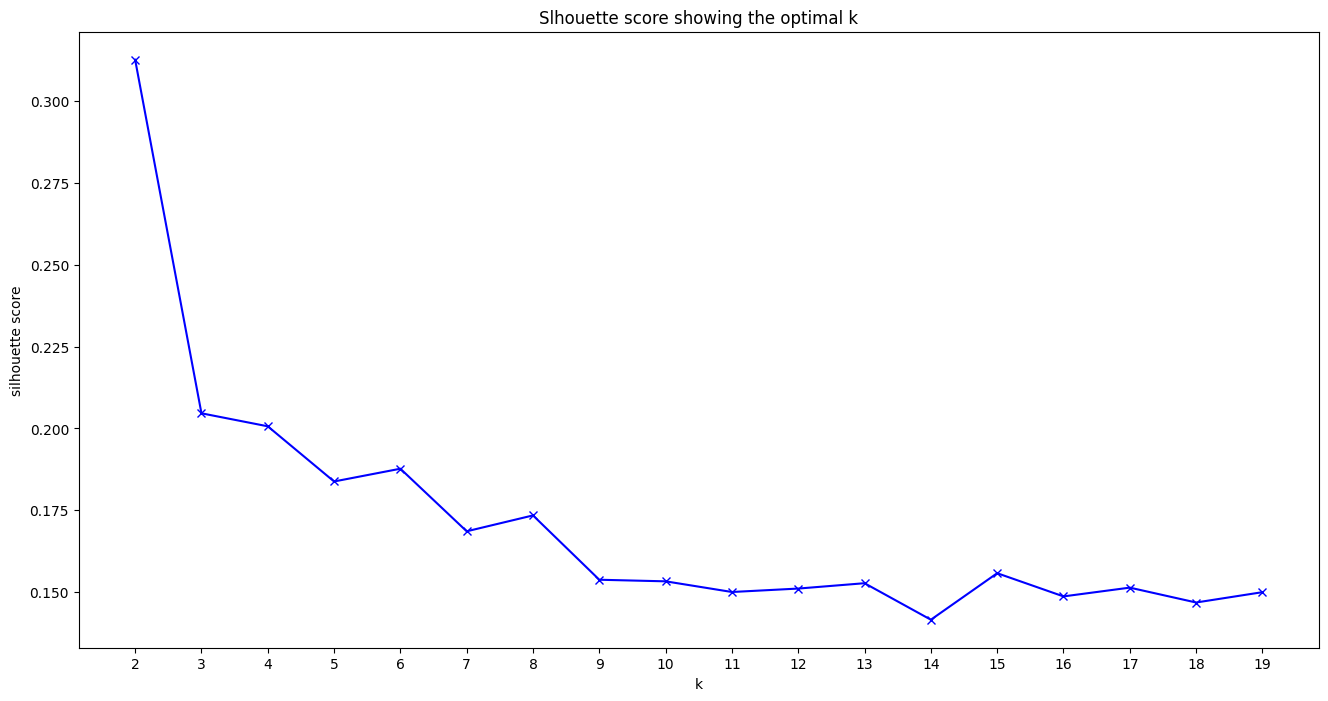

In [9]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    n_init=10)
    kmeans.fit(scaled_features_df)
    silhouette.append(silhouette_score(scaled_features_df, kmeans.predict(scaled_features_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

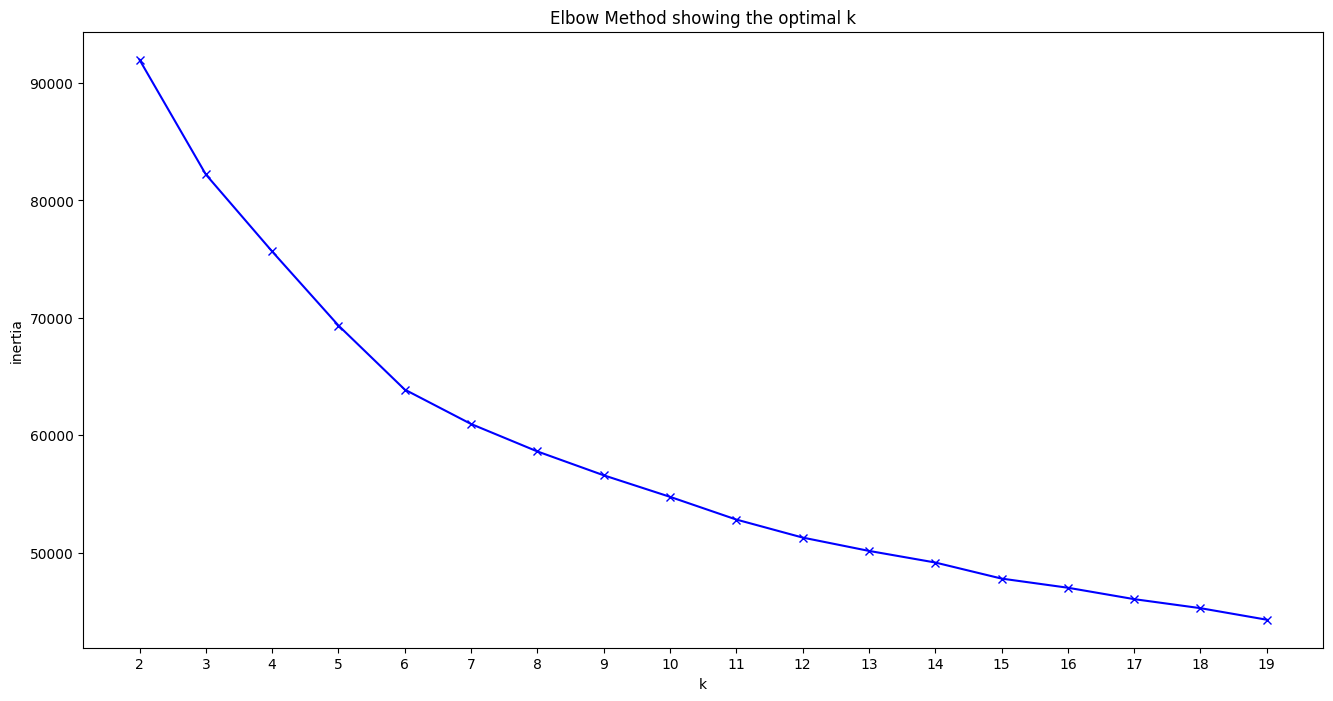

In [11]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    n_init=10)
    kmeans.fit(scaled_features_df)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

> build k_means model

In [12]:
kmeans_model = KMeans(n_clusters=10, random_state=3, n_init=10).fit(scaled_features_df)
preds = kmeans_model.predict(scaled_features_df)

In [13]:
# add onto both df's
audio_df['cluster'] = preds
scaled_features_df['cluster'] = preds
scaled_features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,1.231896,-0.156591,1.642524,0.267738,-1.360708,3.563893,-0.156316,-0.721696,-0.478358,0.247052,-0.469062,7
1,1.787929,0.292464,0.237187,0.779720,0.734911,-0.161743,-0.767340,-0.721168,-0.782248,1.650309,0.528481,4
2,1.255457,0.838437,0.518255,0.492425,-1.360708,-0.275887,-0.367014,-0.722303,-0.095736,-0.207266,-0.437285,8
3,1.495776,0.544452,1.361457,0.650998,-1.360708,0.040002,-0.820014,-0.720865,-0.529129,0.422917,-0.567646,8
4,0.657015,0.628448,-1.168150,0.418898,0.734911,3.683347,-1.029395,-0.722323,-0.264973,0.895555,-0.569902,7
...,...,...,...,...,...,...,...,...,...,...,...,...
12037,0.732409,-0.117823,1.642524,-0.096390,-1.360708,-0.484268,1.160545,1.541811,-0.485716,0.932193,-0.792885,3
12038,0.944456,0.922433,1.080389,0.483409,0.734911,-0.376760,0.491580,-0.696296,-0.590201,0.437573,-0.113945,4
12039,0.313029,0.428150,-0.606015,0.708597,-1.360708,-0.007780,0.136027,-0.722275,-0.463642,1.027453,-0.134216,8
12040,0.755970,0.534760,1.642524,0.159051,-1.360708,-0.570541,1.002522,1.493799,-0.569598,1.408494,-0.792434,3


In [14]:
clusters = scaled_features_df.groupby('cluster').agg('mean')
clusters

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,,,
0,0.000757,-0.664302,-0.142564,0.033376,0.734911,-0.397983,0.858911,-0.308431,-0.288350,-0.357846,-0.199412
1,-0.203869,0.798993,-0.027347,0.314577,-0.047227,0.194005,-0.582788,-0.078392,3.528185,-0.066390,0.073716
2,-1.439183,-1.465135,-0.134720,-1.714175,0.361435,-0.395147,1.336159,1.458851,-0.408035,-1.114713,-1.312869
3,0.052090,-0.627943,0.134296,-0.073753,-1.360708,-0.299731,0.777272,0.297257,-0.239570,-0.392041,-0.303926
4,0.620963,0.581365,0.773234,0.537304,0.734911,-0.201793,-0.628073,-0.437239,-0.090865,0.679198,-0.121603
5,-0.398392,0.785560,0.095286,0.618357,0.412822,0.145895,-0.751751,-0.505878,0.194591,0.047005,1.524001
6,-1.429146,-1.505890,-0.170292,-1.971748,0.424164,-0.371485,1.348402,1.530584,-0.412278,-1.088132,0.684989
7,0.659636,0.381008,0.024487,0.486990,-0.379970,3.201566,-0.420594,-0.532557,0.041595,0.336027,0.151341
8,0.597730,0.687132,0.292823,0.568606,-1.360708,-0.095673,-0.716979,-0.391535,-0.078729,0.508990,0.156226


> pickle cluster model

In [15]:
with open('cluster_model.pkl', 'wb') as f:
    pickle.dump((kmeans_model, clusters), f)

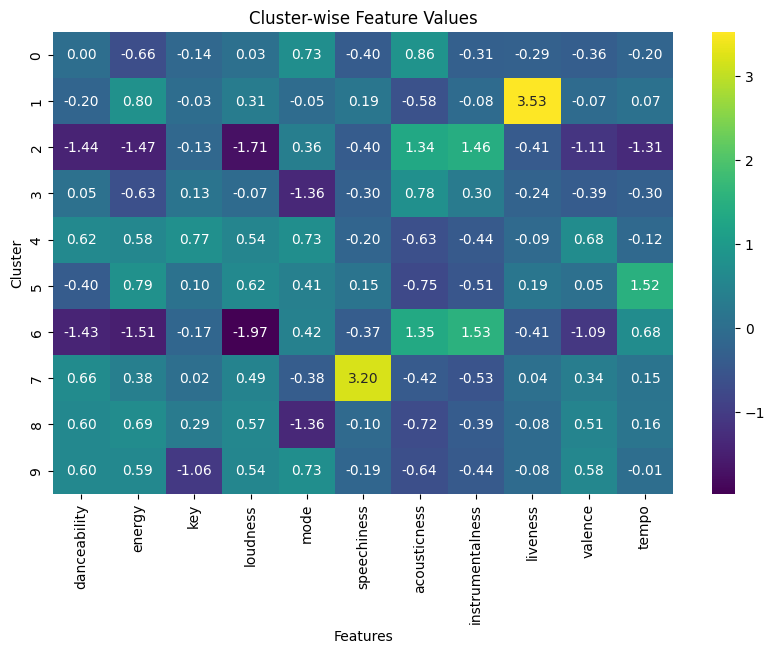

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(clusters, cmap='viridis', annot=True, fmt=".2f")
plt.title('Cluster-wise Feature Values')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

| Cluster | Description                                                                                                                                                         |
|---------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 0       | - Low danceability and energy. - Moderate acousticness and instrumentalness. - Relatively low speechiness and liveness. - Moderate tempo.                          |
| 1       | - Moderate energy and valence. - Low acousticness and instrumentalness. - High liveness. - Moderate tempo.                                                          |
| 2       | - Very low danceability, energy, and valence. - Very high instrumentalness. - High acousticness. - High liveness. - Very low tempo.                                 |
| 3       | - Low energy and valence. - Moderate speechiness and liveness. - Moderate tempo.                                                                                    |
| 4       | - High danceability, energy, and tempo. - Moderate instrumentalness. - Low acousticness and liveness. - High valence.                                             |
| 5       | - Moderate energy, valence, and tempo. - Low instrumentalness. - Very high speechiness. - Very low acousticness. - Moderate liveness.                               |
| 6       | - Very low danceability, energy, and valence. - Very high instrumentalness. - High acousticness. - High liveness. - Very low tempo.                                  |
| 7       | - High danceability and energy. - Very high speechiness. - Low acousticness and instrumentalness. - Very low liveness. - Moderate tempo.                            |
| 8       | - High danceability, energy, and tempo. - Moderate speechiness and acousticness. - Low instrumentalness and liveness. - High valence.                                 |
| 9       | - High danceability, energy, and valence. - Moderate speechiness. - Low instrumentalness, liveness, and tempo.                                                     |


In [17]:
clustered_df = audio_df[['song_id', 'song_artist', 'song_title', 'cluster']]
clustered_df

,song_id,song_artist,song_title,cluster
0,6df3If2RzcZ0CP79sVEuSe,"Olexesh, Bonez MC",Cabrio,7
1,3pPMgoouYtezLiBTEeL9be,"FOURTY, Bausa",VEMPA,4
2,6aCAQmJMBHve3Tfelte1HR,"Dardan, Azet",Pa Mu,8
3,16f4ZN6XOfrIO8fJkm28HM,"AYLIVA, Apache 207",Wunder,8
4,5g6kQitL4OSo9tWkWDGkNT,"Celo & Abdi, Summer Cem, Nimo",So So Def (feat. Summer Cem & Nimo),7
...,...,...,...,...
12037,2SbLBxUtlSzz8nIYFQstwq,Govi,Samba Delight,3
12038,6ExQLKsX71y57iO7iA8Ggd,Johannes Linstead,Andalucia,4
12039,7A1prltPZsLqZ1iTROIkhz,"Traditional, Alhama, Los",El Lerele,8
12040,0aiqrNJkcz1xDGUD8HLrRz,Govi,Bumblebeat,3


In [18]:
clustered_df['cluster'].value_counts()

cluster
8    2238
4    1573
9    1474
2    1414
0    1407
5    1028
3     896
6     816
7     703
1     493
Name: count, dtype: int64

In [19]:
clustered_df.to_csv('./cache/6_clustered_df.csv', index=False)
audio_df.to_csv('./cache/6_all_data.csv', index=False)